In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [10]:
headbrain = pd.read_csv("brain.csv")
print(headbrain.head())

headbrain  = headbrain.values

X = headbrain[:,2]
Y = headbrain[:,3]


   Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0       1          1             4512                 1530
1       1          1             3738                 1297
2       1          1             4261                 1335
3       1          1             3777                 1282
4       1          1             4177                 1590


In [11]:
def Linear_Regression(X,Y):
    mean_x = np.mean(X)
    mean_y = np.mean(Y)

    n = len(X)
    numerator= 0
    denominator=0
    for i in range(n):
        numerator   += ((X[i] - mean_x) * (Y[i] - mean_y))
        denominator += ((X[i] - mean_x) ** 2)

    m = numerator/ denominator
    c = mean_y - m * mean_x
    
    return(m,c)

def predict(X,m,c):
    pred_y=[]
    for i in range(len(X)):
        pred_y.append(c + m * X[i])

    return(pred_y)

In [12]:
def r2score(y_obs,y_pred):
    yhat = np.mean(y_obs)
    
    ss_res = 0.0
    ss_tot = 0.0
    
    for i in range(len(y_obs)):
        ss_tot += (y_obs[i]-yhat)**2
        ss_res += (y_obs[i]-y_pred[i])**2
        
    r2 = 1 - (ss_res/ss_tot)

    return r2

slope =  0.2582466016876776
intercept =  340.44133383678525
R-squared : 0.6409423690074076


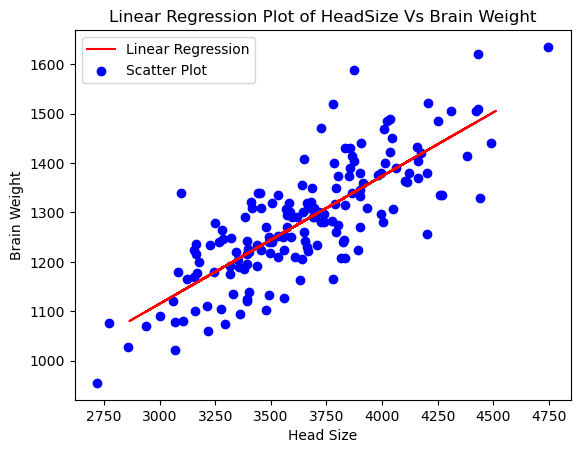

In [13]:
plt.title("Linear Regression Plot of HeadSize Vs Brain Weight")

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

m,c = Linear_Regression(X_train,y_train)
print("slope = ", m)
print('intercept = ',c)
      
y_pred =  predict(X_test,m,c)

print("R-squared :",r2score(y_test,y_pred))

plt.plot(X_test,y_pred,color='red',label='Linear Regression')
plt.scatter(X_train,y_train,c='b',label='Scatter Plot')
plt.xlabel("Head Size")
plt.ylabel("Brain Weight")
plt.legend()
plt.show()